In [125]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime, timedelta
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings('ignore')

# 设置绘图风格
plt.style.use('ggplot')
sns.set(style="whitegrid")

In [126]:
# 定义时间范围 - 建议使用2年左右的数据以捕捉不同市场环境
end_date = datetime.now()
start_date = end_date - timedelta(days=730)  # 大约2年的数据

# 使用yfinance获取比特币和以太坊的价格数据
btc_data = yf.download('BTC-USD', start=start_date, end=end_date)
eth_data = yf.download('ETH-USD', start=start_date, end=end_date)

# 查看比特币数据的前几行
print("比特币价格数据样例：")
btc_data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

比特币价格数据样例：


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2023-04-19,28822.679688,30411.054688,28669.898438,30394.187500,24571565421
2023-04-20,28245.988281,29076.400391,28037.257812,28823.683594,21340360360
2023-04-21,27276.910156,28349.968750,27177.365234,28249.230469,20759504330
2023-04-22,27817.500000,27872.142578,27169.570312,27265.894531,13125734602
2023-04-23,27591.384766,27820.244141,27400.314453,27816.144531,12785446832


In [127]:
# 首先检查数据框中实际有哪些列
print("btc_data 的列名：")
print(btc_data.columns.tolist())

# 也检查一下数据框是否为空
print("\nbtc_data 的形状：", btc_data.shape)
print("\nbtc_data 前几行：")
print(btc_data.head())

btc_data 的列名：
[('Close', 'BTC-USD'), ('High', 'BTC-USD'), ('Low', 'BTC-USD'), ('Open', 'BTC-USD'), ('Volume', 'BTC-USD')]

btc_data 的形状： (731, 5)

btc_data 前几行：
Price              Close          High           Low          Open  \
Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2023-04-19  28822.679688  30411.054688  28669.898438  30394.187500   
2023-04-20  28245.988281  29076.400391  28037.257812  28823.683594   
2023-04-21  27276.910156  28349.968750  27177.365234  28249.230469   
2023-04-22  27817.500000  27872.142578  27169.570312  27265.894531   
2023-04-23  27591.384766  27820.244141  27400.314453  27816.144531   

Price            Volume  
Ticker          BTC-USD  
Date                     
2023-04-19  24571565421  
2023-04-20  21340360360  
2023-04-21  20759504330  
2023-04-22  13125734602  
2023-04-23  12785446832  


比特币价格数据信息：
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2023-04-19 to 2025-04-18
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   731 non-null    float64
 1   (High, BTC-USD)    731 non-null    float64
 2   (Low, BTC-USD)     731 non-null    float64
 3   (Open, BTC-USD)    731 non-null    float64
 4   (Volume, BTC-USD)  731 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 34.3 KB

缺失值检查：
Price   Ticker 
Close   BTC-USD    0
High    BTC-USD    0
Low     BTC-USD    0
Open    BTC-USD    0
Volume  BTC-USD    0
dtype: int64

基本统计描述：
计算收益率后的列： [('Close', 'BTC-USD'), ('High', 'BTC-USD'), ('Low', 'BTC-USD'), ('Open', 'BTC-USD'), ('Volume', 'BTC-USD'), ('Returns', '')]


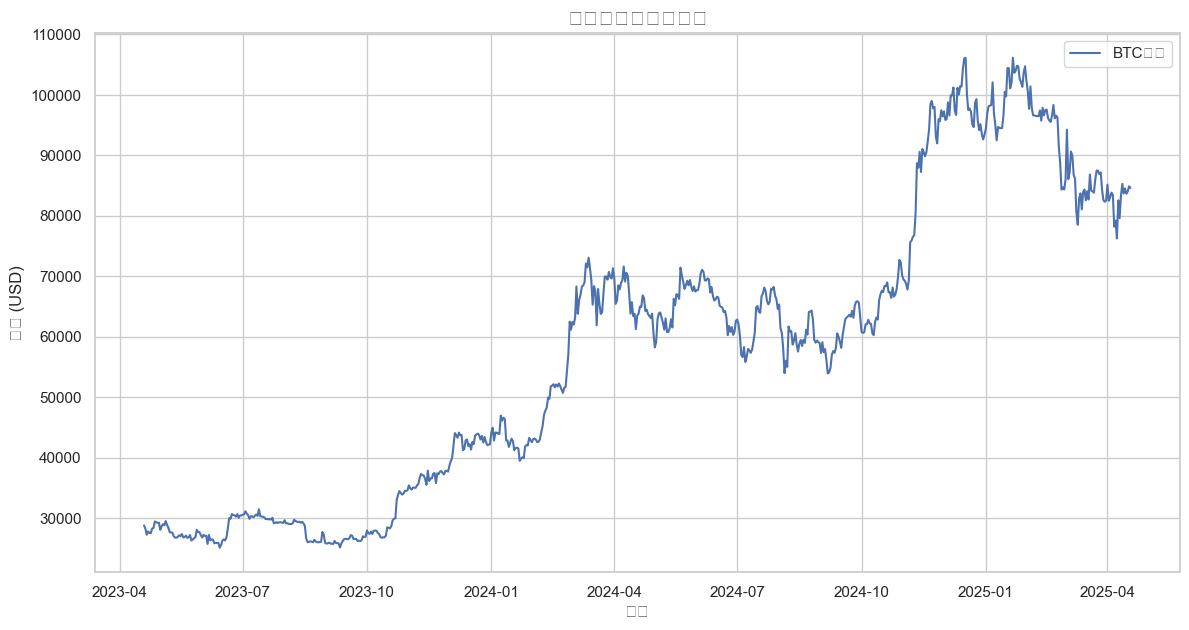

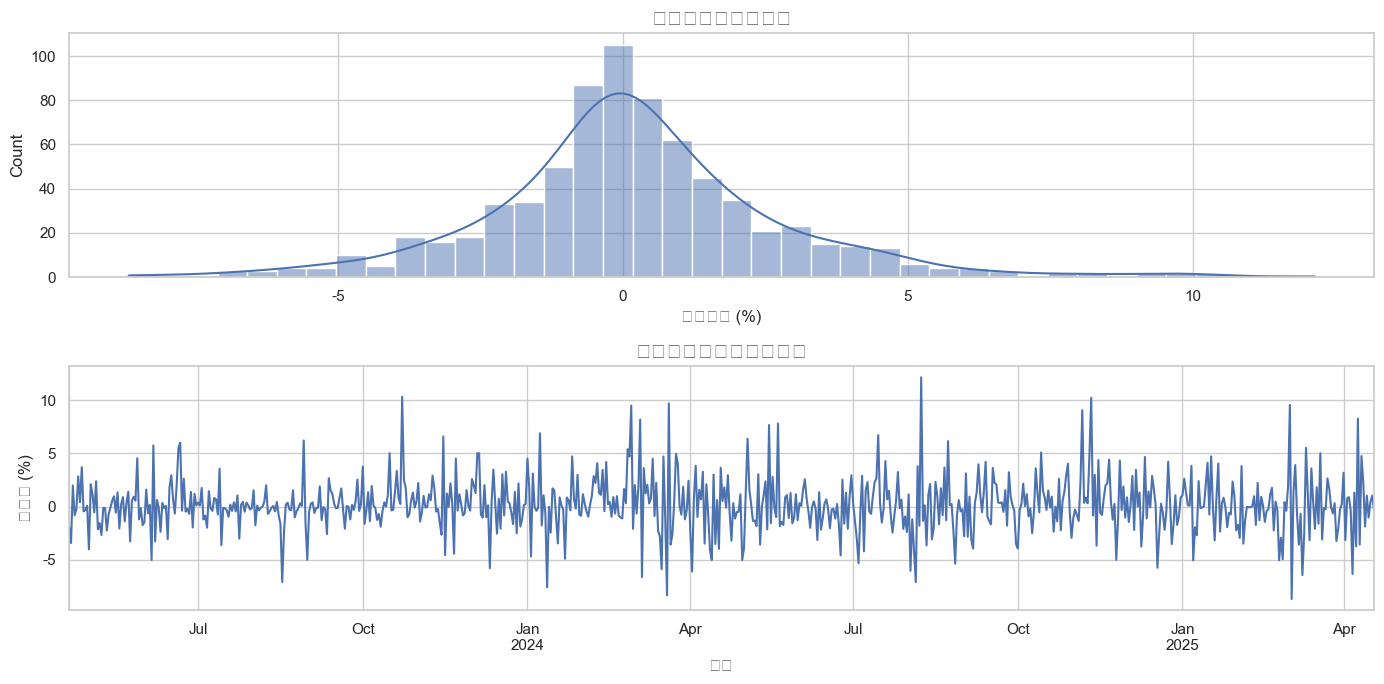

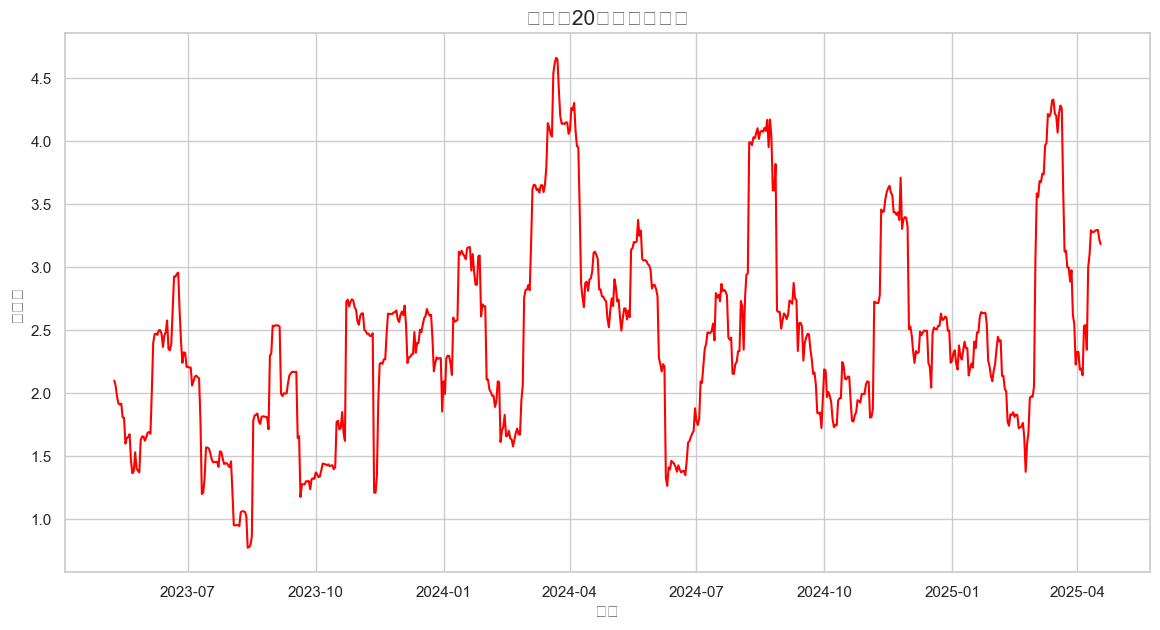

In [128]:
# 检查数据的基本信息
print("比特币价格数据信息：")
btc_data.info()

# 检查是否有缺失值
print("\n缺失值检查：")
print(btc_data.isnull().sum())

# 基本统计描述
print("\n基本统计描述：")
btc_data.describe()

# 如果有 'Close' 列
btc_data['Returns'] = btc_data['Close'].pct_change() * 100
eth_data['Returns'] = eth_data['Close'].pct_change() * 100

# 或者如果数据框只有 'Open'、'High'、'Low'、'Close' 和 'Volume' 这些基本列
# 显示修改后的列
print("计算收益率后的列：", btc_data.columns.tolist())

# 绘制价格时间序列图
plt.figure(figsize=(14, 7))
plt.plot(btc_data.index, btc_data['Close'], label='BTC价格')
plt.title('比特币价格历史走势', fontsize=15)
plt.xlabel('日期')
plt.ylabel('价格 (USD)')
plt.legend()
plt.grid(True)
plt.show()

# 绘制收益率分布
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
sns.histplot(btc_data['Returns'].dropna(), kde=True)
plt.title('比特币日收益率分布', fontsize=15)
plt.xlabel('日收益率 (%)')

plt.subplot(2, 1, 2)
btc_data['Returns'].dropna().plot(kind='line')
plt.title('比特币日收益率时间序列', fontsize=15)
plt.xlabel('日期')
plt.ylabel('收益率 (%)')
plt.tight_layout()
plt.show()

# 计算波动率（20日滚动标准差）
btc_data['Volatility'] = btc_data['Returns'].rolling(window=20).std()

# 绘制波动率
plt.figure(figsize=(14, 7))
plt.plot(btc_data.index, btc_data['Volatility'], color='red')
plt.title('比特币20日滚动波动率', fontsize=15)
plt.xlabel('日期')
plt.ylabel('波动率')
plt.grid(True)
plt.show()

开始加密货币情感与价格数据探索性分析...

分析数据集: 最终数据

加载 df_Final.csv...
成功使用分号作为分隔符加载数据。

1. 最终数据数据基本信息:
   行数: 12936, 列数: 16

   数据类型和非空值计数:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12936 entries, 0 to 12935
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    12936 non-null  object 
 1   Compound_Score          12358 non-null  float64
 2   Total Volume of Tweets  12358 non-null  float64
 3   Count_Negatives         12358 non-null  float64
 4   Count_Positives         12358 non-null  float64
 5   Count_Neutrals          12358 non-null  float64
 6   Sent_Negatives          12358 non-null  float64
 7   Sent_Positives          12357 non-null  float64
 8   Count_News              12358 non-null  float64
 9   Count_Bots              12358 non-null  float64
 10  Open                    12358 non-null  float64
 11  High                    12358 non-null  float64
 12  Low                

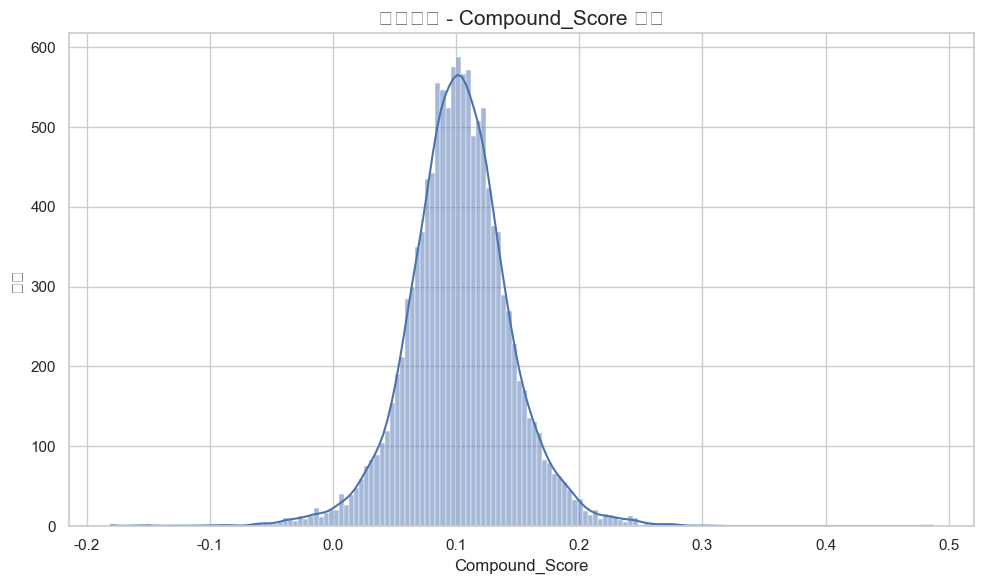

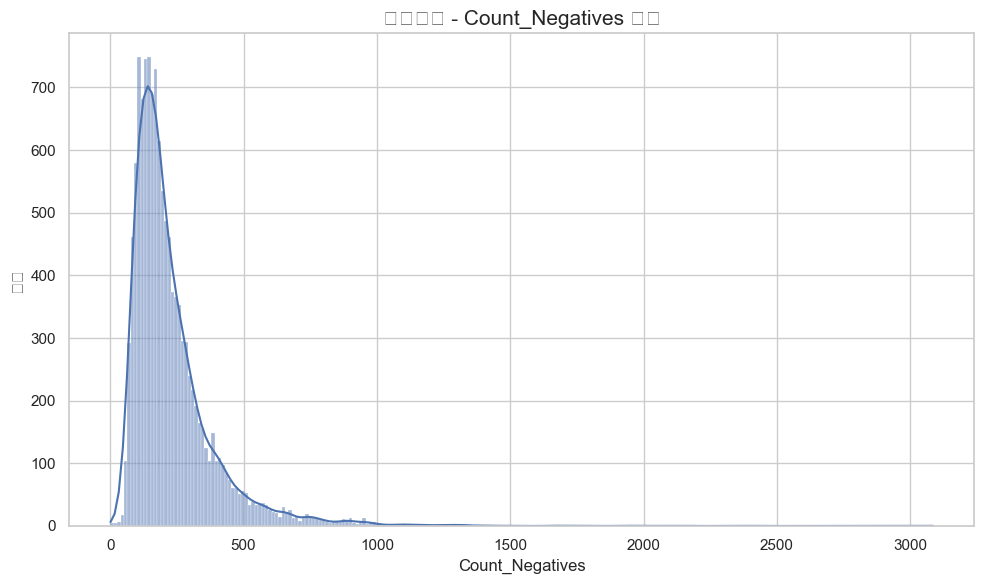

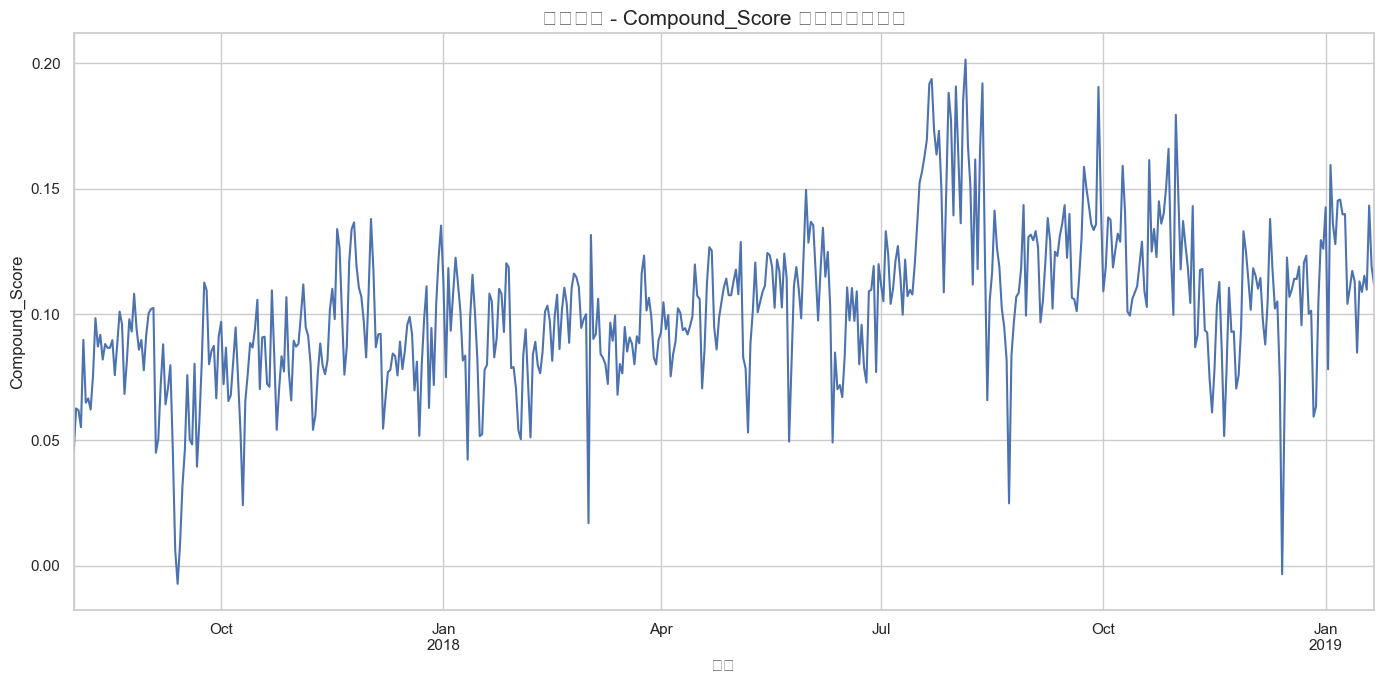

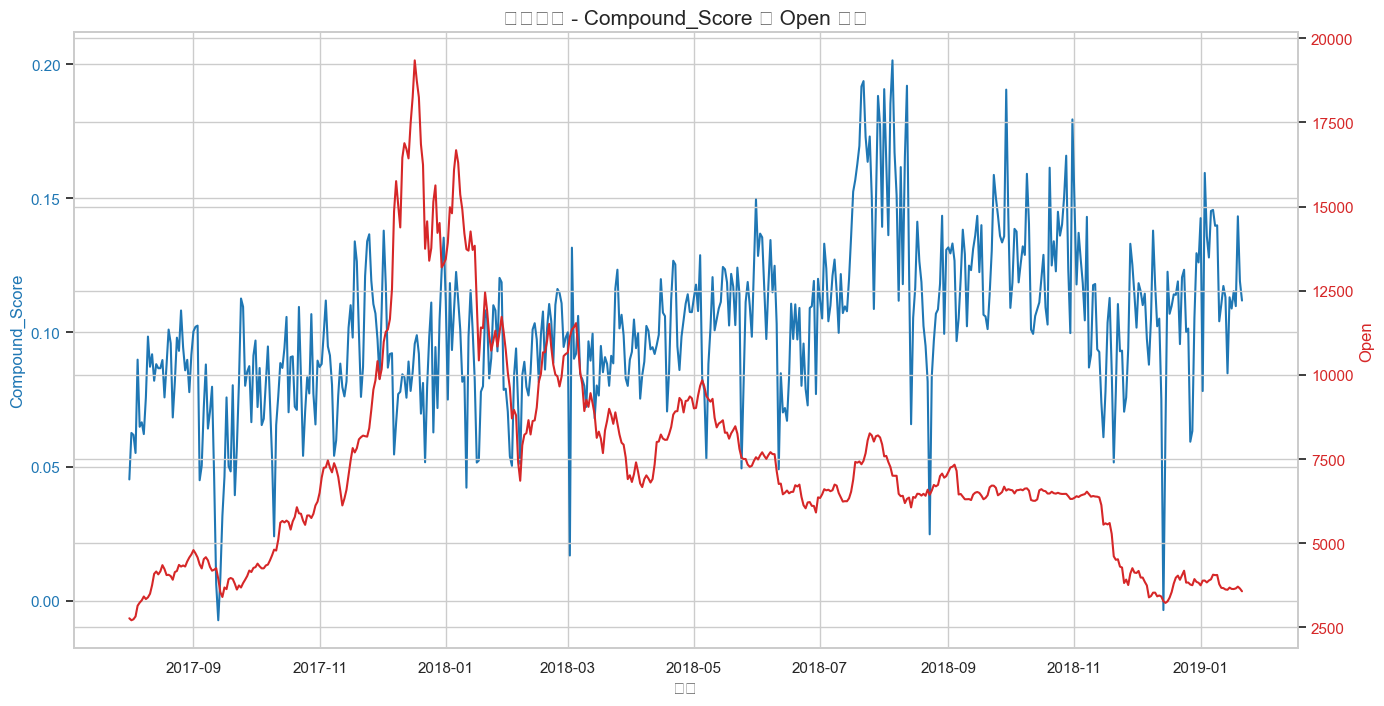


6. Compound_Score 与 Open 的相关系数: 0.0015


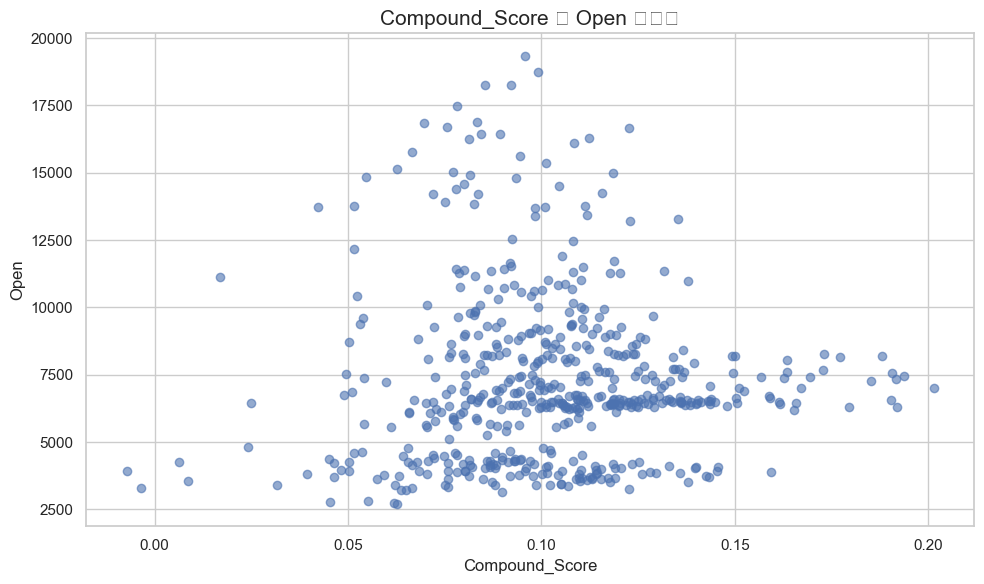


分析数据集: 小时级别数据

加载 Data_To_Hourervals_no_filter.csv...
成功使用分号作为分隔符加载数据。

1. 小时级别数据数据基本信息:
   行数: 12936, 列数: 14

   数据类型和非空值计数:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12936 entries, 0 to 12935
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               12936 non-null  object 
 1   Compound_Score     12362 non-null  float64
 2   n                  12665 non-null  float64
 3   Count_Negatives    12665 non-null  float64
 4   Count_Positives    12665 non-null  float64
 5   Count_Neutrals     12665 non-null  float64
 6   Sent_Negatives     12358 non-null  float64
 7   Sent_Positives     12358 non-null  float64
 8   Open               12936 non-null  float64
 9   High               12936 non-null  float64
 10  Low                12936 non-null  float64
 11  Close              12936 non-null  float64
 12  Volume (BTC)       12936 non-null  object 
 13  Volume (Currency)  12936 non-null  obje

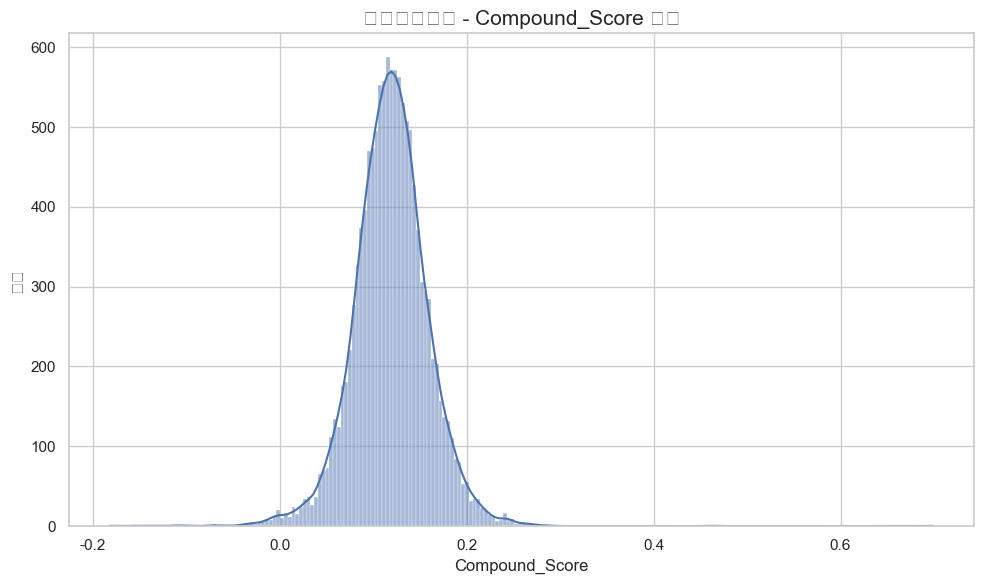

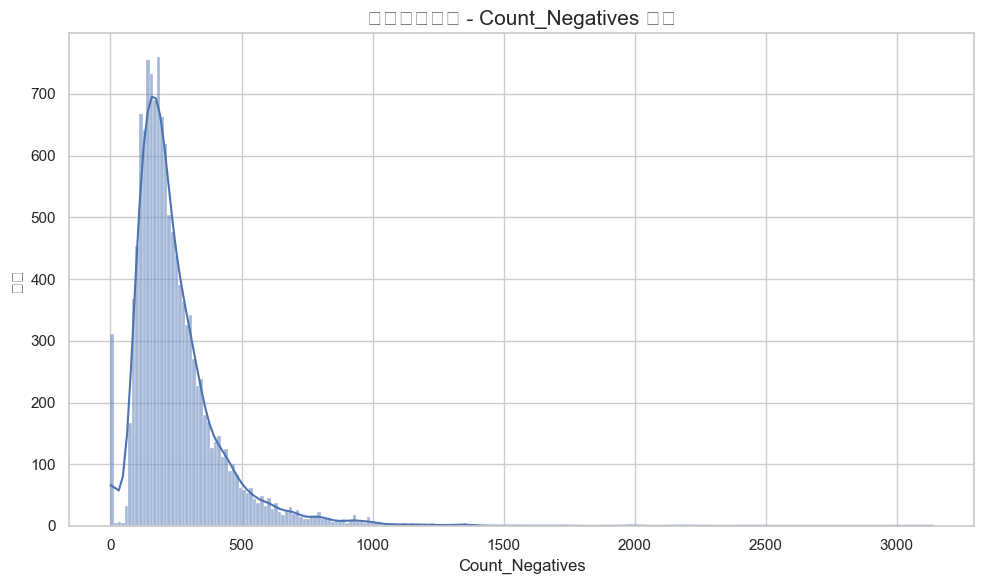

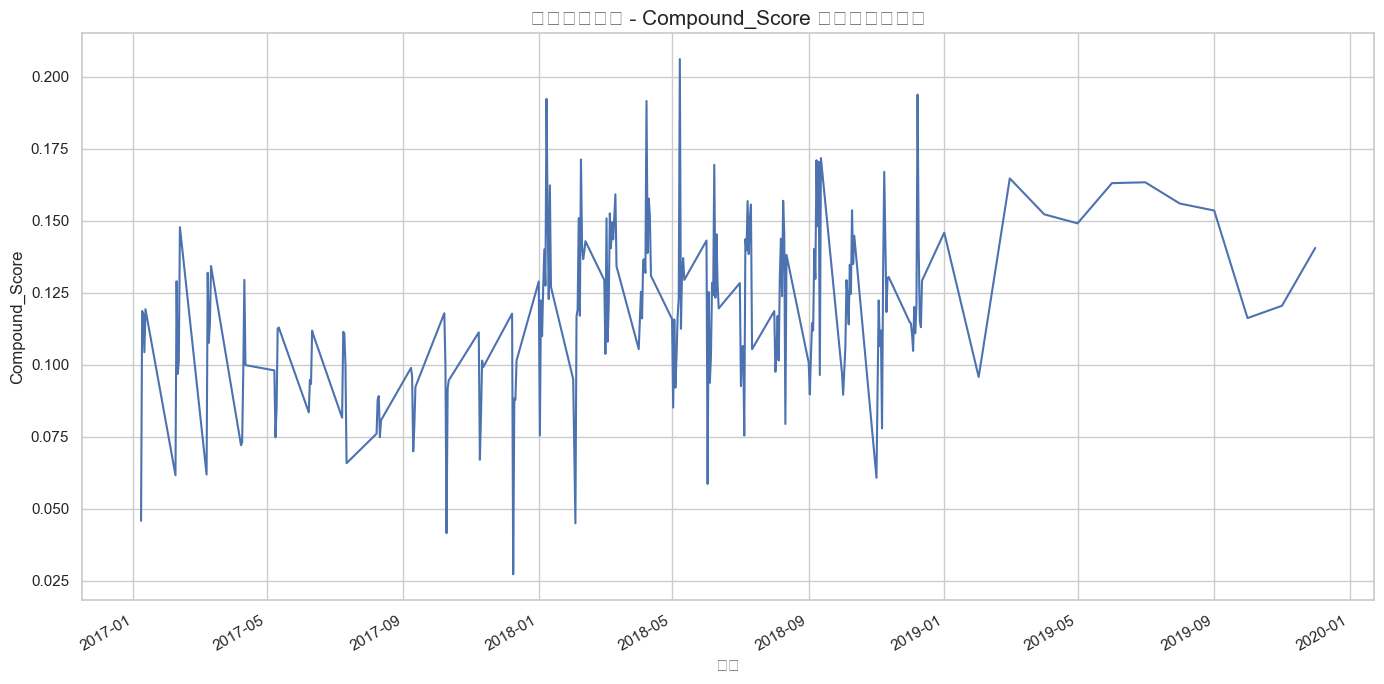

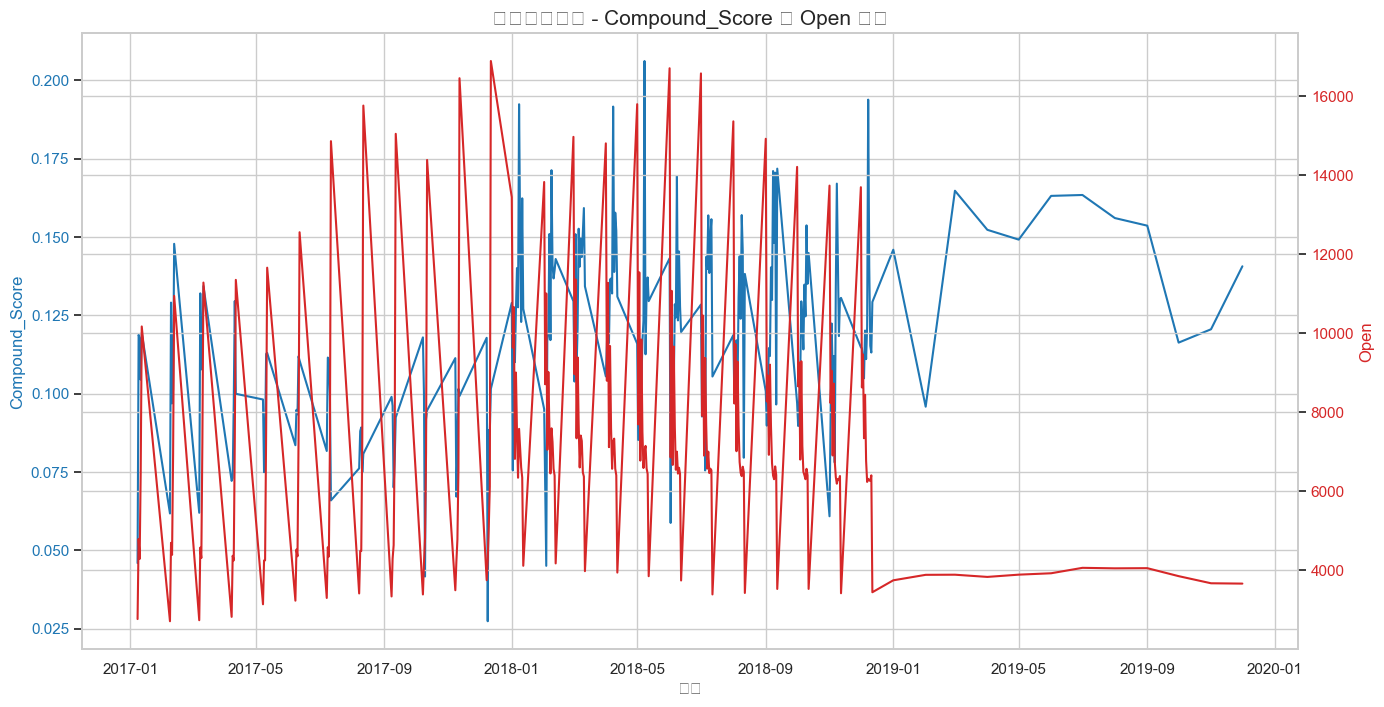


6. Compound_Score 与 Open 的相关系数: -0.0629


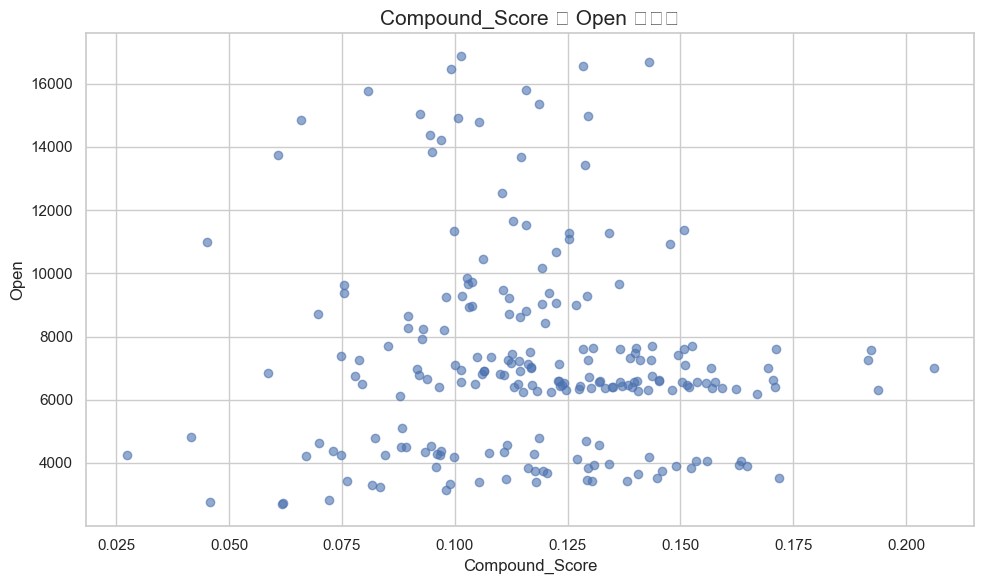


探索性数据分析完成!


In [129]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体支持和绘图风格
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号
plt.style.use('ggplot')
sns.set(style="whitegrid")

def explore_dataset(filepath, name):
    print(f"\n{'='*50}")
    print(f"分析数据集: {name}")
    print(f"{'='*50}")
    
    # 使用分号作为分隔符加载数据
    print(f"\n加载 {filepath}...")
    try:
        df = pd.read_csv(filepath, sep=';', encoding='utf-8')
        print(f"成功使用分号作为分隔符加载数据。")
    except Exception as e:
        print(f"使用分号分隔符加载失败: {e}")
        try:
            # 尝试更灵活的方法
            df = pd.read_csv(filepath, sep=';', encoding='utf-8', error_bad_lines=False, warn_bad_lines=True)
            print(f"成功加载数据（忽略错误行）。")
        except Exception as e2:
            print(f"所有加载方法都失败了: {e2}")
            return pd.DataFrame()
    
    # 1. 数据基本信息
    print(f"\n1. {name}数据基本信息:")
    print(f"   行数: {df.shape[0]}, 列数: {df.shape[1]}")
    print("\n   数据类型和非空值计数:")
    print(df.info())
    
    # 2. 显示前几行数据
    print(f"\n2. {name}数据样例 (前5行):")
    print(df.head())
    
    # 3. 列名分析
    print(f"\n3. {name}列名分析:")
    columns = df.columns.tolist()
    print(f"   列名: {columns}")
    
    # 4. 寻找可能的关键列
    # 寻找情感相关列
    sentiment_cols = [col for col in columns if any(term in col.lower() for term in ['sentiment', 'emotion', 'score', 'compound', 'positive', 'negative'])]
    print(f"\n4.1 可能的情感列: {sentiment_cols if sentiment_cols else '未找到'}")
    
    # 寻找日期/时间相关列
    date_cols = [col for col in columns if any(term in col.lower() for term in ['date', 'time', 'day', 'hour', 'timestamp'])]
    print(f"4.2 可能的时间列: {date_cols if date_cols else '未找到'}")
    
    # 寻找价格相关列
    price_cols = [col for col in columns if any(term in col.lower() for term in ['price', 'value', 'close', 'open', 'high', 'low'])]
    print(f"4.3 可能的价格列: {price_cols if price_cols else '未找到'}")
    
    # 5. 数据分布分析
    # 数值型列的统计分析
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    if numerical_cols:
        print(f"\n5.1 数值型列的统计分析:")
        print(df[numerical_cols].describe())
    
    # 6. 可视化分析
    # 如果找到情感列，绘制其分布
    if sentiment_cols:
        for col in sentiment_cols[:2]:  # 限制只分析前两个情感列
            plt.figure(figsize=(10, 6))
            if df[col].dtype == 'object':  # 对分类数据使用计数图
                df[col].value_counts().head(10).plot(kind='bar')
            else:  # 对数值型数据使用直方图
                sns.histplot(df[col].dropna(), kde=True)
            plt.title(f'{name} - {col} 分布', fontsize=15)
            plt.xlabel(col)
            plt.ylabel('频率')
            plt.tight_layout()
            plt.show()
    
    # 如果同时找到日期列和情感列，绘制时间序列
    if date_cols and sentiment_cols:
        try:
            date_col = date_cols[0]
            sentiment_col = sentiment_cols[0]
            
            # 尝试转换日期列
            if df[date_col].dtype == 'object':
                df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
            
            # 检查转换是否成功
            if pd.api.types.is_datetime64_any_dtype(df[date_col]):
                # 按日期汇总情感数据
                time_unit = 'D'  # 默认按天汇总
                
                # 如果数据点过多，考虑按天汇总
                if df[date_col].nunique() > 100:
                    df['date_truncated'] = df[date_col].dt.floor(time_unit)
                    time_series = df.groupby('date_truncated')[sentiment_col].mean()
                else:
                    time_series = df.groupby(date_col)[sentiment_col].mean()
                
                plt.figure(figsize=(14, 7))
                time_series.plot()
                plt.title(f'{name} - {sentiment_col} 随时间变化趋势', fontsize=15)
                plt.xlabel('时间')
                plt.ylabel(sentiment_col)
                plt.grid(True)
                plt.tight_layout()
                plt.show()
                
                # 如果同时有价格数据，绘制价格与情感的关系
                if price_cols:
                    price_col = price_cols[0]
                    
                    # 创建按日期汇总的价格数据
                    if 'date_truncated' in df.columns:
                        price_series = df.groupby('date_truncated')[price_col].mean()
                    else:
                        price_series = df.groupby(date_col)[price_col].mean()
                    
                    # 创建双Y轴图表
                    fig, ax1 = plt.subplots(figsize=(14, 7))
                    
                    color = 'tab:blue'
                    ax1.set_xlabel('时间')
                    ax1.set_ylabel(sentiment_col, color=color)
                    ax1.plot(time_series.index, time_series.values, color=color)
                    ax1.tick_params(axis='y', labelcolor=color)
                    
                    ax2 = ax1.twinx()
                    color = 'tab:red'
                    ax2.set_ylabel(price_col, color=color)
                    ax2.plot(price_series.index, price_series.values, color=color)
                    ax2.tick_params(axis='y', labelcolor=color)
                    
                    fig.tight_layout()
                    plt.title(f'{name} - {sentiment_col} 与 {price_col} 关系', fontsize=15)
                    plt.grid(True)
                    plt.show()
                    
                    # 计算相关性
                    # 确保两个序列有相同的索引
                    aligned_data = pd.merge(
                        pd.DataFrame(time_series),
                        pd.DataFrame(price_series),
                        left_index=True, right_index=True,
                        how='inner'
                    )
                    
                    if not aligned_data.empty:
                        correlation = aligned_data[sentiment_col].corr(aligned_data[price_col])
                        print(f"\n6. {sentiment_col} 与 {price_col} 的相关系数: {correlation:.4f}")
                        
                        # 绘制散点图
                        plt.figure(figsize=(10, 6))
                        plt.scatter(aligned_data[sentiment_col], aligned_data[price_col], alpha=0.6)
                        plt.title(f'{sentiment_col} 与 {price_col} 散点图', fontsize=15)
                        plt.xlabel(sentiment_col)
                        plt.ylabel(price_col)
                        plt.grid(True)
                        plt.tight_layout()
                        plt.show()
        except Exception as e:
            print(f"时间序列分析出错: {e}")
    
    return df

# 分析两个数据集
print("开始加密货币情感与价格数据探索性分析...")

# 首先分析最终处理好的数据
try:
    df_final = explore_dataset('df_Final.csv', '最终数据')
except Exception as e:
    print(f"无法加载或分析 df_Final.csv: {e}")

# 然后分析原始数据
try:
    df_hourly = explore_dataset('Data_To_Hourervals_no_filter.csv', '小时级别数据')
except Exception as e:
    print(f"无法加载或分析 Data_To_Hourervals_no_filter.csv: {e}")

print("\n探索性数据分析完成!")

In [130]:
def analyze_sentiment_price_relationship(df, name):
    """对情感和价格数据进行关联性分析"""
    print(f"\n{'='*50}")
    print(f"4. {name} - 情感与价格关系分析")
    print(f"{'='*50}")
    
    # 找出关键列
    date_cols = [col for col in df.columns if any(term in col.lower() for term in ['date', 'time'])]
    sentiment_cols = [col for col in df.columns if any(term in col.lower() for term in 
                     ['sentiment', 'compound', 'score', 'positive', 'negative'])]
    price_cols = [col for col in df.columns if any(term in col.lower() for term in 
                 ['price', 'close', 'open', 'high', 'low'])]
    
    # 验证找到了必要的列
    if not (date_cols and sentiment_cols and price_cols):
        print("缺少必要的列（日期、情感或价格）。请检查数据结构。")
        missing = []
        if not date_cols: missing.append("日期")
        if not sentiment_cols: missing.append("情感")  
        if not price_cols: missing.append("价格")
        print(f"缺少的列类型: {', '.join(missing)}")
        print("可用列: ", df.columns.tolist())
        return
    
    # 选择要使用的主要列
    date_col = date_cols[0]
    sentiment_col = [col for col in sentiment_cols if 'compound' in col.lower() or 'score' in col.lower()]
    sentiment_col = sentiment_col[0] if sentiment_col else sentiment_cols[0]
    price_col = [col for col in price_cols if 'close' in col.lower()]
    price_col = price_col[0] if price_col else price_cols[0]
    
    print(f"使用以下列进行分析:")
    print(f"  - 日期列: {date_col}")
    print(f"  - 情感列: {sentiment_col}")
    print(f"  - 价格列: {price_col}")
    
    # 确保日期列是日期时间类型
    if df[date_col].dtype != 'datetime64[ns]':
        print(f"转换日期列 '{date_col}' 为日期时间类型...")
        try:
            df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
        except Exception as e:
            print(f"日期转换失败: {e}")
            return
    
    # 检查数据质量
    print("\n数据质量检查:")
    print(f"  - 日期列缺失值: {df[date_col].isnull().sum()} ({df[date_col].isnull().mean():.2%})")
    print(f"  - 情感列缺失值: {df[sentiment_col].isnull().sum()} ({df[sentiment_col].isnull().mean():.2%})")
    print(f"  - 价格列缺失值: {df[price_col].isnull().sum()} ({df[price_col].isnull().mean():.2%})")
    
    # 处理缺失值
    df_clean = df.dropna(subset=[date_col, sentiment_col, price_col])
    print(f"删除缺失值后，数据集行数从 {df.shape[0]} 减少到 {df_clean.shape[0]} ({(1 - df_clean.shape[0]/df.shape[0]):.2%} 的减少)")
    
    # 数据规范化处理
    df_analysis = df_clean.copy()
    if df_analysis[date_col].dt.hour.nunique() > 1:
        print("检测到小时级数据，进行日期聚合...")
        df_analysis['date_day'] = df_analysis[date_col].dt.date
        daily_sentiment = df_analysis.groupby('date_day')[sentiment_col].mean()
        daily_price = df_analysis.groupby('date_day')[price_col].mean()
        
        # 合并日度数据
        daily_data = pd.DataFrame({
            'date': daily_sentiment.index,
            'sentiment': daily_sentiment.values,
            'price': daily_price.values
        })
        daily_data.set_index('date', inplace=True)
    else:
        print("使用原始日期粒度...")
        daily_data = pd.DataFrame({
            'sentiment': df_analysis[sentiment_col],
            'price': df_analysis[price_col]
        }, index=df_analysis[date_col])
    
    print(f"最终分析数据集形状: {daily_data.shape}")
    print("前5行数据:")
    print(daily_data.head())
    
    # 绘制时间序列趋势
    plt.figure(figsize=(16, 8))
    
    # 创建双Y轴图表
    fig, ax1 = plt.subplots(figsize=(16, 8))
    
    # 情感数据绘制
    color = 'tab:blue'
    ax1.set_xlabel('日期', fontsize=12)
    ax1.set_ylabel('情感得分', color=color, fontsize=12)
    ax1.plot(daily_data.index, daily_data['sentiment'], color=color, label='情感得分')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc='upper left')
    
    # 价格数据绘制
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('价格', color=color, fontsize=12)
    ax2.plot(daily_data.index, daily_data['price'], color=color, label='价格')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='upper right')
    
    # 增加网格和标题
    ax1.grid(True, alpha=0.3)
    plt.title(f'{name} - 情感得分与价格的时间序列关系', fontsize=16)
    fig.tight_layout()
    plt.show()
    
    # 计算相关系数
    correlation = daily_data['sentiment'].corr(daily_data['price'])
    print(f"\n情感与价格的皮尔逊相关系数: {correlation:.4f}")
    
    # 散点图
    plt.figure(figsize=(10, 6))
    sns.regplot(x='sentiment', y='price', data=daily_data, scatter_kws={'alpha':0.5})
    plt.title(f'情感得分与价格关系散点图 (相关系数: {correlation:.4f})', fontsize=14)
    plt.xlabel('情感得分')
    plt.ylabel('价格')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # 滞后分析 - 情感是否领先或滞后于价格
    print("\n滞后相关性分析:")
    max_lag = 7  # 分析最多7天的滞后
    lag_results = {}
    
    # 情感领先于价格的相关性 (正滞后)
    print("情感领先于价格的相关性:")
    for lag in range(1, max_lag + 1):
        lag_sentiment = daily_data['sentiment'].shift(lag)
        lag_corr = lag_sentiment.corr(daily_data['price'])
        lag_results[lag] = lag_corr
        print(f"  - 情感领先{lag}天: {lag_corr:.4f}")
    
    # 价格领先于情感的相关性 (负滞后)
    print("\n价格领先于情感的相关性:")
    for lag in range(1, max_lag + 1):
        lag_price = daily_data['price'].shift(lag)
        lag_corr = daily_data['sentiment'].corr(lag_price)
        lag_results[-lag] = lag_corr
        print(f"  - 价格领先{lag}天: {lag_corr:.4f}")
    
    # 可视化滞后相关性
    plt.figure(figsize=(12, 6))
    lags = sorted(lag_results.keys())
    corrs = [lag_results[lag] for lag in lags]
    plt.bar(lags, corrs)
    plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='r', linestyle='-', alpha=0.3)
    plt.title('情感与价格的滞后相关性分析', fontsize=14)
    plt.xlabel('滞后天数 (负值表示价格领先情感，正值表示情感领先价格)')
    plt.ylabel('相关系数')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # 找出最大相关性的滞后期
    max_lag_key = max(lag_results, key=lambda k: abs(lag_results[k]))
    print(f"\n最大相关性出现在滞后期: {max_lag_key} 天，相关系数: {lag_results[max_lag_key]:.4f}")
    
    if max_lag_key > 0:
        print(f"这表明情感变化可能领先价格变化 {max_lag_key} 天")
    elif max_lag_key < 0:
        print(f"这表明价格变化可能领先情感变化 {abs(max_lag_key)} 天")
    
    return daily_data

In [131]:
# 计算价格波动与情感波动的关系
try:
    if 'merged_data' in locals():
        # 计算情感的变化和波动性
        merged_data['sentiment_change'] = merged_data['sentiment'].diff()
        merged_data['sentiment_volatility'] = merged_data['sentiment'].rolling(window=7).std()
        
        # 计算价格的变化率
        merged_data['price_change_pct'] = merged_data['Adj Close'].pct_change() * 100
        
        # 绘制情感波动与价格波动的关系
        plt.figure(figsize=(14, 7))
        plt.scatter(merged_data['sentiment_volatility'].dropna(), 
                   merged_data['Volatility'].dropna(), 
                   alpha=0.5)
        plt.title('情感波动性与价格波动性关系', fontsize=15)
        plt.xlabel('情感7日波动性')
        plt.ylabel('价格20日波动性')
        plt.grid(True)
        plt.show()
        
        # 检查极端情感与价格变化的关系
        threshold = merged_data['sentiment'].std() * 1.5
        merged_data['extreme_sentiment'] = np.where(
            abs(merged_data['sentiment'] - merged_data['sentiment'].mean()) > threshold, 
            1, 0)
        
        # 比较极端情感日与非极端情感日的价格变化
        extreme_days = merged_data[merged_data['extreme_sentiment'] == 1]['price_change_pct']
        normal_days = merged_data[merged_data['extreme_sentiment'] == 0]['price_change_pct']
        
        plt.figure(figsize=(10, 6))
        plt.boxplot([normal_days.dropna(), extreme_days.dropna()], 
                   labels=['普通情感日', '极端情感日'])
        plt.title('普通情感日vs极端情感日的价格变化比较', fontsize=15)
        plt.ylabel('价格日变化率 (%)')
        plt.grid(True)
        plt.show()
        
        # 描述性统计
        print("普通情感日价格变化统计：")
        print(normal_days.describe())
        
        print("\n极端情感日价格变化统计：")
        print(extreme_days.describe())
except Exception as e:
    print(f"无法执行进一步分析: {e}")

开始加密货币情感与价格数据探索性分析...
成功加载数据，形状: (12936, 16)

4. 加密货币 - 情感与价格关系分析
使用以下列进行分析:
  - 日期列: Date
  - 情感列: Compound_Score
  - 价格列: Close
转换日期列 'Date' 为日期时间类型...

数据质量检查:
  - 日期列缺失值: 0 (0.00%)
  - 情感列缺失值: 578 (4.47%)
  - 价格列缺失值: 578 (4.47%)
删除缺失值后，数据集行数从 12936 减少到 12358 (4.47% 的减少)
检测到小时级数据，进行日期聚合...
最终分析数据集形状: (539, 2)
前5行数据:
            sentiment        price
date                              
2017-08-01   0.045239  2764.869167
2017-08-02   0.062566  2711.504737
2017-08-03   0.061826  2745.320417
2017-08-04   0.055104  2827.973750
2017-08-05   0.089877  3161.758750


<Figure size 1600x800 with 0 Axes>

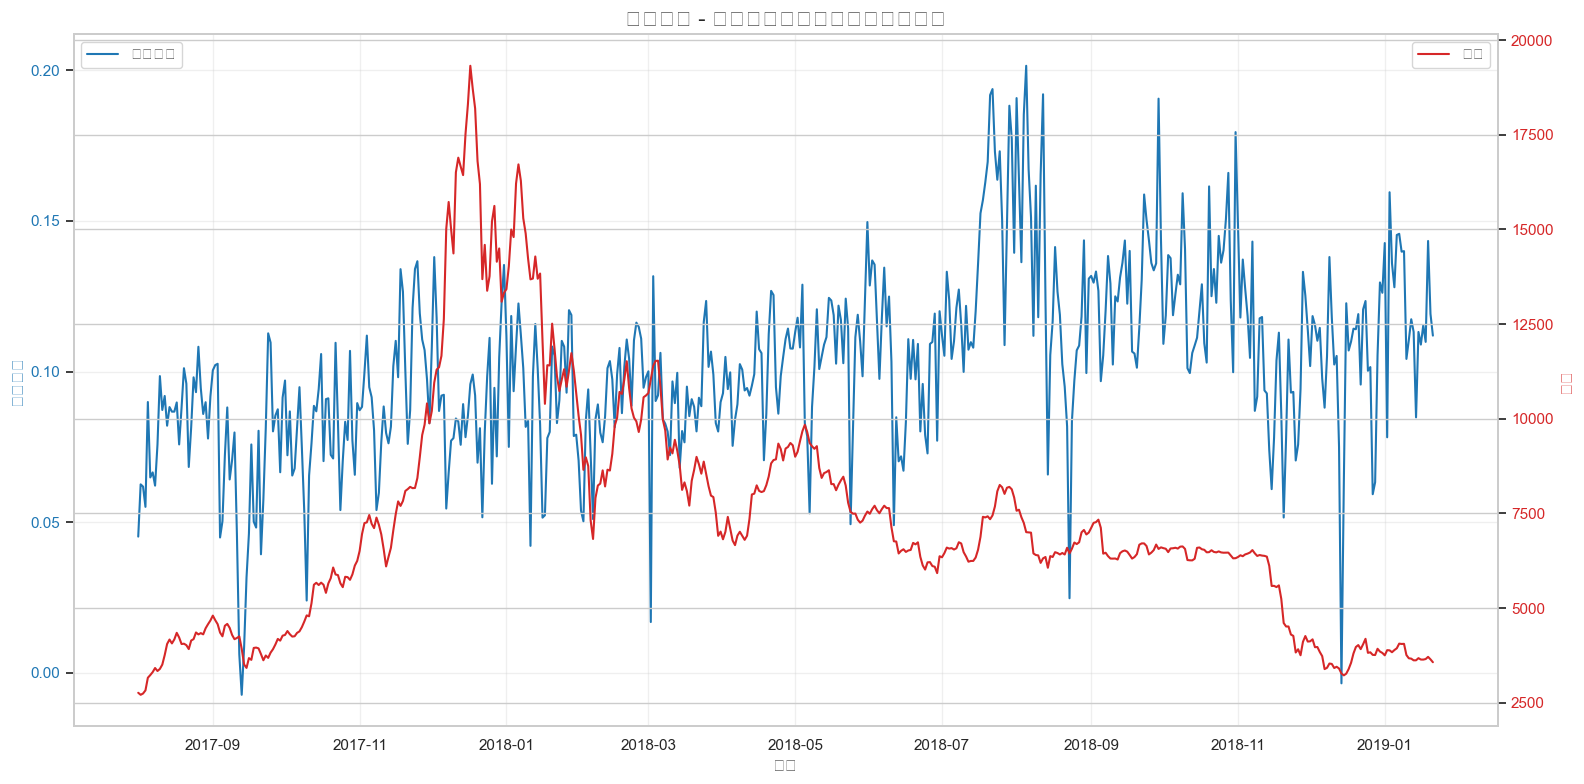


情感与价格的皮尔逊相关系数: 0.0021


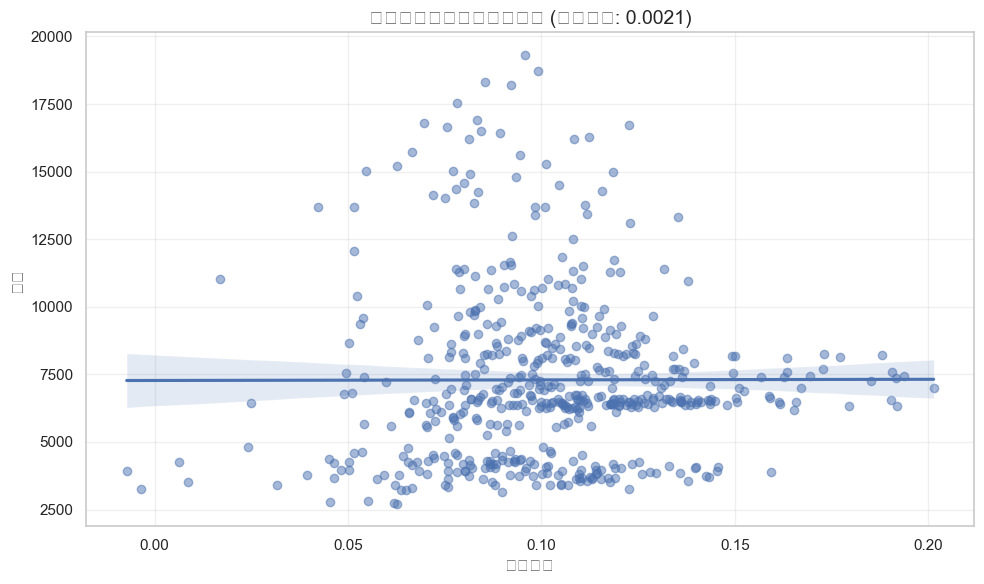


滞后相关性分析:
情感领先于价格的相关性:
  - 情感领先1天: 0.0017
  - 情感领先2天: 0.0002
  - 情感领先3天: -0.0036
  - 情感领先4天: -0.0066
  - 情感领先5天: -0.0049
  - 情感领先6天: -0.0045
  - 情感领先7天: -0.0075

价格领先于情感的相关性:
  - 价格领先1天: -0.0178
  - 价格领先2天: -0.0327
  - 价格领先3天: -0.0420
  - 价格领先4天: -0.0471
  - 价格领先5天: -0.0490
  - 价格领先6天: -0.0536
  - 价格领先7天: -0.0576


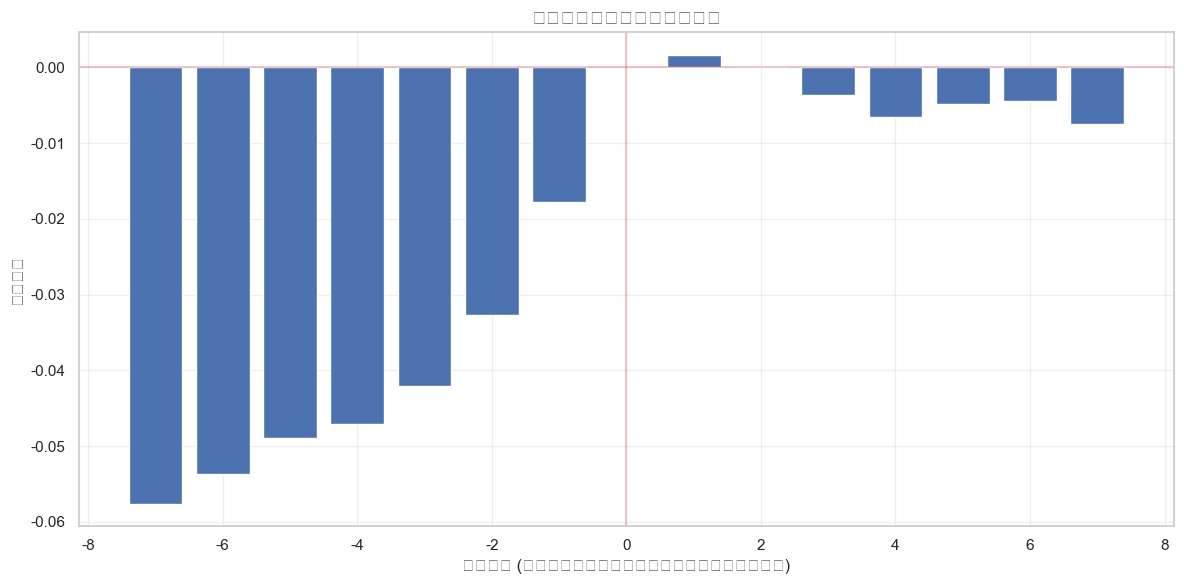


最大相关性出现在滞后期: -7 天，相关系数: -0.0576
这表明价格变化可能领先情感变化 7 天

5. 加密货币 - 进阶探索性分析

1. 计算价格和情感的变化率
变化率统计:
       price_change  sentiment_change
count    538.000000        538.000000
mean       0.128730          0.000124
std        4.024495          0.022958
min      -16.410353         -0.083163
25%       -1.926761         -0.013363
50%        0.085539          0.000889
75%        2.439840          0.013336
max       18.853528          0.114701

2. 计算波动性
价格波动性与情感波动性的相关系数: -0.1154

3. 极端情感分析
极端情感天数统计:
  - normal: 473 天 (87.92%)
  - extremely_positive: 33 天 (6.13%)
  - extremely_negative: 32 天 (5.95%)

不同情感类别下的价格变化统计:
                    count      mean       std        min       25%       50%  \
extreme_sentiment                                                              
extremely_negative   32.0 -2.577606  7.126858 -15.511698 -5.577167 -3.346571   
extremely_positive   33.0  0.377229  2.412590  -4.406519 -0.747851  0.026194   
normal              473.0  0.294486  3.764049 -16.410353 -1.760927  

In [132]:
# 导入所需库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体支持和绘图风格
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')
sns.set(style="whitegrid")

# [此处插入之前提供的explore_dataset函数]

# [此处插入上面提供的analyze_sentiment_price_relationship函数]

# [此处插入上面提供的advanced_exploratory_analysis函数]

# [此处插入上面提供的main_analysis函数]

# 主程序
print("开始加密货币情感与价格数据探索性分析...")

if __name__ == "__main__":
# 加载数据
    try:
        df_final = pd.read_csv('df_Final.csv', sep=';', encoding='utf-8')
        print(f"成功加载数据，形状: {df_final.shape}")
        
        # 执行核心分析
        result_df = main_analysis(df_final)
        
        if result_df is not None:
            print("分析完成，已生成增强特征数据集")
            print(f"最终数据集形状: {result_df.shape}")
        else:
            print("分析过程中遇到问题，未能生成最终数据集")
            
    except Exception as e:
        print(f"加载或分析数据时出错: {e}")

    print("\n探索性数据分析完成!")

In [134]:
# 情感分析深化示例代码
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

# 假设df_final已加载并包含文本列"tweets_text"
# 如果没有原始文本，则跳过此步骤，使用现有的Compound_Score

# 初始化VADER分析器
sia = SentimentIntensityAnalyzer()

# 添加加密货币专用词汇（可选，如果有原始文本）
# 这些词在加密货币语境中有特殊含义
crypto_lexicon = {
    "moon": 4.0,
    "hodl": 2.0,
    "dump": -3.0,
    "fud": -3.0,
    "bullish": 3.0,
    "bearish": -3.0,
    # 添加更多加密货币特定词汇
}
sia.lexicon.update(crypto_lexicon)

# 应用增强的情感分析（如果有原始文本）
if 'tweets_text' in df_final.columns:
    # VADER增强分析
    df_final['vader_enhanced'] = df_final['tweets_text'].apply(
        lambda x: sia.polarity_scores(x)['compound'] if isinstance(x, str) else None
    )
    
    # TextBlob提供的另一种情感度量
    df_final['textblob_polarity'] = df_final['tweets_text'].apply(
        lambda x: TextBlob(x).sentiment.polarity if isinstance(x, str) else None
    )
    
    # 情感强度（无论正负，只关注强度）
    df_final['sentiment_intensity'] = df_final['vader_enhanced'].abs()

In [136]:
# 修改后的特征工程和数据准备代码
import pandas as pd
import numpy as np
from datetime import datetime

# 1. 加载数据
try:
    df_final = pd.read_csv('df_Final.csv', sep=';', encoding='utf-8')
    print(f"成功加载数据，原始形状: {df_final.shape}")
    
    # 2. 检查数据类型
    print("\n数据类型检查:")
    print(df_final.dtypes)
    
    # 3. 转换日期列为日期时间类型
    df_final['Date'] = pd.to_datetime(df_final['Date'], errors='coerce')
    
    # 4. 检查非数值列并进行适当处理
    object_columns = df_final.select_dtypes(include=['object']).columns.tolist()
    if len(object_columns) > 0:
        print(f"\n发现对象类型列: {object_columns}")
        # 移除日期列（如果它出现在对象列中）
        if 'Date' in object_columns:
            object_columns.remove('Date')
        
        # 对剩余对象列尝试转换为数值
        for col in object_columns:
            try:
                df_final[col] = pd.to_numeric(df_final[col], errors='coerce')
                print(f"  - 成功将列 '{col}' 转换为数值类型")
            except Exception as e:
                print(f"  - 无法将列 '{col}' 转换为数值类型: {e}")
    
    # 5. 按日期分组并计算每日平均值（只使用数值列）
    print("\n创建每日汇总数据...")
    # 标识数值列
    numeric_columns = df_final.select_dtypes(include=['number']).columns.tolist()
    print(f"数值列 ({len(numeric_columns)}): {numeric_columns[:5]}...")  # 只显示前5个
    
    # 按日期分组并计算平均值（只使用数值列）
    df_daily = df_final.groupby(df_final['Date'].dt.date)[numeric_columns].mean().reset_index()
    print(f"每日汇总数据形状: {df_daily.shape}")
    
    # 6. 确保日期列是日期时间类型
    df_daily['Date'] = pd.to_datetime(df_daily['Date'])
    
    # 7. 创建特征
    print("\n创建特征...")
    
    # 7.1 滞后特征 - 基于发现价格领先情感
    lag_columns = []  # 跟踪创建的滞后列
    for i in range(1, 10):
        # 找出价格列（可能是 'Open', 'Close', 'Price' 等）
        price_cols = [col for col in numeric_columns if any(term in col.lower() for term in ['open', 'close', 'price'])]
        if price_cols:
            price_col = price_cols[0]  # 使用第一个匹配的价格列
            col_name = f'price_lag_{i}'
            df_daily[col_name] = df_daily[price_col].shift(i)
            lag_columns.append(col_name)
            
            # 价格变化率
            col_name = f'price_change_{i}'
            df_daily[col_name] = df_daily[price_col].pct_change(i) * 100
            lag_columns.append(col_name)
        
        # 找出情感列
        sentiment_cols = [col for col in numeric_columns if any(term in col.lower() for term in ['sentiment', 'compound'])]
        if sentiment_cols:
            sentiment_col = sentiment_cols[0]  # 使用第一个匹配的情感列
            col_name = f'sentiment_lag_{i}'
            df_daily[col_name] = df_daily[sentiment_col].shift(i)
            lag_columns.append(col_name)
    
    # 7.2 波动性特征
    windows = [3, 7, 14]  # 使用较短的窗口以减少NaN
    volatility_columns = []
    for window in windows:
        # 价格波动性
        if price_cols:
            col_name = f'price_volatility_{window}d'
            df_daily[col_name] = df_daily[price_col].pct_change().rolling(window).std()
            volatility_columns.append(col_name)
        
        # 情感波动性
        if sentiment_cols:
            col_name = f'sentiment_volatility_{window}d'
            df_daily[col_name] = df_daily[sentiment_col].rolling(window).std()
            volatility_columns.append(col_name)
    
    # 7.3 移动平均特征
    ma_columns = []
    for window in windows:
        # 价格移动平均
        if price_cols:
            col_name = f'price_ma_{window}d'
            df_daily[col_name] = df_daily[price_col].rolling(window).mean()
            ma_columns.append(col_name)
        
        # 情感移动平均
        if sentiment_cols:
            col_name = f'sentiment_ma_{window}d'
            df_daily[col_name] = df_daily[sentiment_col].rolling(window).mean()
            ma_columns.append(col_name)
    
    # 7.4 趋势特征
    if price_cols and 'price_ma_14d' in df_daily.columns:  # 使用14天移动平均线定义趋势
        df_daily['trend'] = 'sideways'
        df_daily.loc[df_daily[price_col] > df_daily['price_ma_14d'] * 1.05, 'trend'] = 'uptrend'
        df_daily.loc[df_daily[price_col] < df_daily['price_ma_14d'] * 0.95, 'trend'] = 'downtrend'
        
        # 将趋势转换为数值特征
        trend_map = {'uptrend': 1, 'sideways': 0, 'downtrend': -1}
        df_daily['trend_numeric'] = df_daily['trend'].map(trend_map)
    
    # 7.5 极端情感指标
    if sentiment_cols:
        sentiment_mean = df_daily[sentiment_col].mean()
        sentiment_std = df_daily[sentiment_col].std()
        df_daily['extreme_sentiment'] = 0  # 正常情感
        df_daily.loc[df_daily[sentiment_col] > sentiment_mean + 1.5 * sentiment_std, 'extreme_sentiment'] = 1  # 极端正面
        df_daily.loc[df_daily[sentiment_col] < sentiment_mean - 1.5 * sentiment_std, 'extreme_sentiment'] = -1  # 极端负面
    
    # 7.6 交叉特征
    if price_cols and sentiment_cols:
        df_daily['price_sentiment_ratio'] = df_daily[price_col] / (df_daily[sentiment_col].abs() + 0.01)  # 加0.01避免除以0
        
        if 'price_change_1' in df_daily.columns:
            df_daily['price_change_sentiment_product'] = df_daily['price_change_1'] * df_daily[sentiment_col]
    
    # 8. 删除NaN并保存特征数据集
    print("\n删除缺失值并保存数据集...")
    # 使用前向填充处理NaN（适合时间序列）
    df_daily_filled = df_daily.fillna(method='ffill')
    # 然后使用后向填充处理开始部分的NaN
    df_daily_filled = df_daily_filled.fillna(method='bfill')
    # 最后对任何剩余NaN使用0填充
    df_features = df_daily_filled.fillna(0)
    
    # 保存处理后的数据集
    df_features.to_csv('crypto_features_clean.csv', index=False)
    print(f"特征工程完成，生成{df_features.shape[1]}个特征，数据集形状: {df_features.shape}")
    print(f"数据已保存至 'crypto_features_clean.csv'")
    
    # 输出特征列表以供参考
    print("\n创建的特征列表:")
    print(f"- 滞后特征: {len(lag_columns)} 列")
    print(f"- 波动性特征: {len(volatility_columns)} 列")
    print(f"- 移动平均特征: {len(ma_columns)} 列")
    print("- 趋势特征: 'trend', 'trend_numeric'")
    print("- 情感特征: 'extreme_sentiment'")
    
except Exception as e:
    import traceback
    print(f"处理过程中遇到错误: {e}")
    traceback.print_exc()

成功加载数据，原始形状: (12936, 16)

数据类型检查:
Date                       object
Compound_Score            float64
Total Volume of Tweets    float64
Count_Negatives           float64
Count_Positives           float64
Count_Neutrals            float64
Sent_Negatives            float64
Sent_Positives            float64
Count_News                float64
Count_Bots                float64
Open                      float64
High                      float64
Low                       float64
Close                     float64
Volume (BTC)               object
Volume (Currency)          object
dtype: object

发现对象类型列: ['Volume (BTC)', 'Volume (Currency)']
  - 成功将列 'Volume (BTC)' 转换为数值类型
  - 成功将列 'Volume (Currency)' 转换为数值类型

创建每日汇总数据...
数值列 (15): ['Compound_Score', 'Total Volume of Tweets', 'Count_Negatives', 'Count_Positives', 'Count_Neutrals']...
每日汇总数据形状: (539, 16)

创建特征...

删除缺失值并保存数据集...
特征工程完成，生成60个特征，数据集形状: (539, 60)
数据已保存至 'crypto_features_clean.csv'

创建的特征列表:
- 滞后特征: 27 列
- 波动性特征: 6 列
- 移动平均特征: 6 列
- 

In [137]:
# 数据准备代码
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 设置因变量（目标变量）
# 根据你的发现，我们可以尝试两种预测任务:
# 1. 使用价格预测未来情感 (因为价格领先情感)
# 2. 根据过去价格和情感预测未来价格 (传统任务)

# 任务1: 预测未来情感
X_sentiment = df_features.drop(['Compound_Score', 'Date', 'trend'], axis=1)
y_sentiment = df_features['Compound_Score']

# 任务2: 预测未来价格
# 我们尝试预测未来1天的价格变化
df_features['future_price_change_1d'] = df_features['Open'].pct_change(-1)  # -1表示未来1天
X_price = df_features.drop(['future_price_change_1d', 'Date', 'trend'], axis=1)
y_price = df_features['future_price_change_1d']

# 去除NaN
X_sentiment = X_sentiment.fillna(0)
y_sentiment = y_sentiment.fillna(0)
X_price = X_price.fillna(0)
y_price = y_price.fillna(0)

# 数据标准化
scaler_X_sentiment = StandardScaler()
X_sentiment_scaled = scaler_X_sentiment.fit_transform(X_sentiment)

scaler_X_price = StandardScaler()
X_price_scaled = scaler_X_price.fit_transform(X_price)

# 数据拆分 - 使用时间序列拆分
# 对于时间序列，最好不用随机拆分，而是按时间顺序拆分
train_size = int(len(X_sentiment_scaled) * 0.8)

# 情感预测任务
X_train_sentiment = X_sentiment_scaled[:train_size]
X_test_sentiment = X_sentiment_scaled[train_size:]
y_train_sentiment = y_sentiment[:train_size]
y_test_sentiment = y_sentiment[train_size:]

# 价格预测任务
X_train_price = X_price_scaled[:train_size]
X_test_price = X_price_scaled[train_size:]
y_train_price = y_price[:train_size]
y_test_price = y_price[train_size:]

print("数据准备完成。")
print(f"训练集大小: {len(X_train_sentiment)}, 测试集大小: {len(X_test_sentiment)}")

数据准备完成。
训练集大小: 431, 测试集大小: 108
